In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('marketing_AB.csv')

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
#Check duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

0

In [8]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace = True)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [10]:
#Check if teh categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [11]:
#Check if the categorical variables have appropriate levels
for i in df_cat.columns:
    print(i.upper(),':',df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariable Analysis

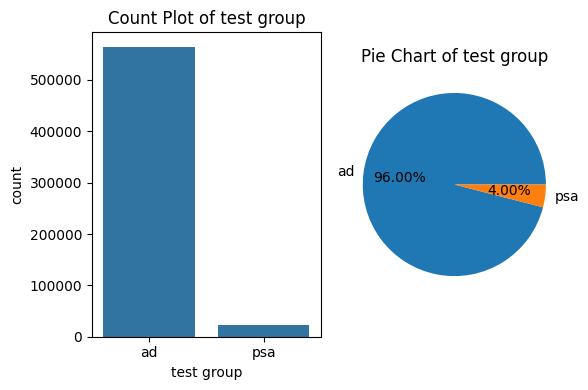

In [12]:
variable = 'test group'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot of {variable}')

# Pe Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

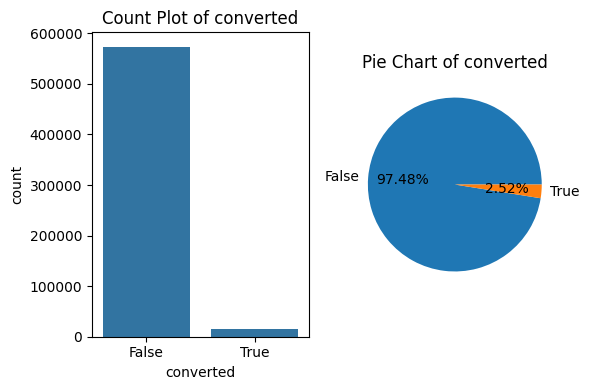

In [13]:
variable = 'converted'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot of {variable}')

# Pe Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

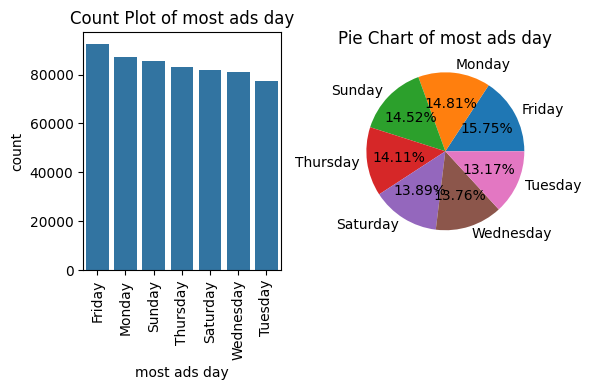

In [16]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order= df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=90)
# Pe Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

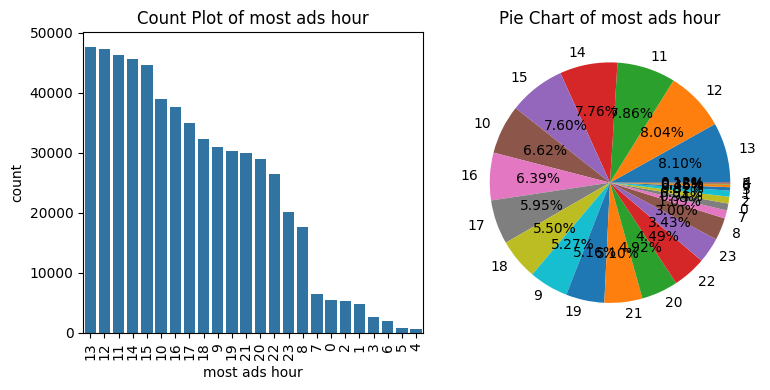

In [17]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order= df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=90)
# Pe Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

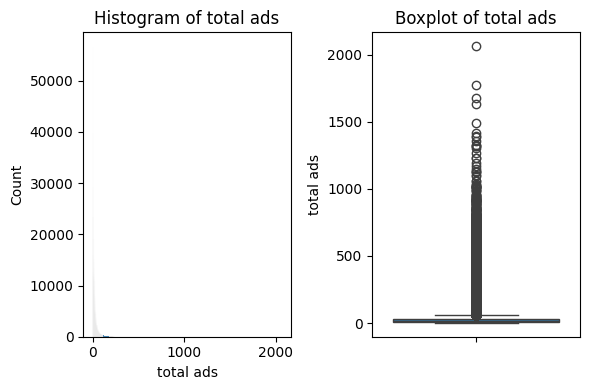

In [19]:
variable = 'total ads'

plt.figure(figsize=(6,4))
# Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram of {variable}')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Check the descriptive stats of this feature
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


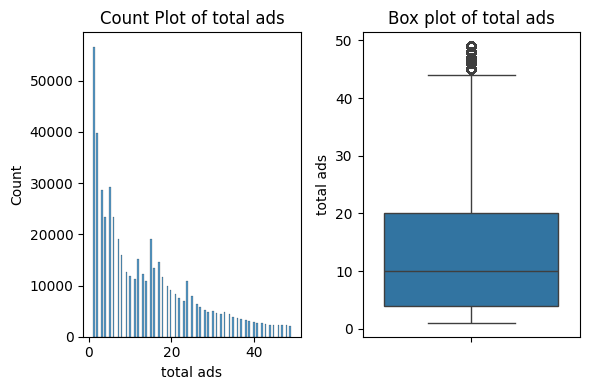

In [21]:
variable = 'total ads'

plt.figure(figsize=(6,4))
# Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title(f'Count Plot of {variable}')

# Pe Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads']<50])
plt.title(f'Box plot of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

## Bivariate  Analysis

In [22]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [23]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

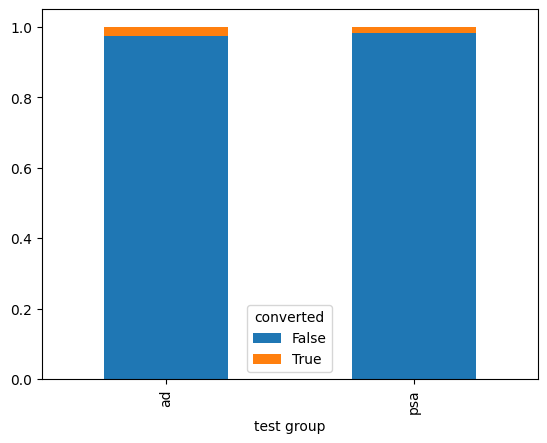

In [24]:
ct_conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

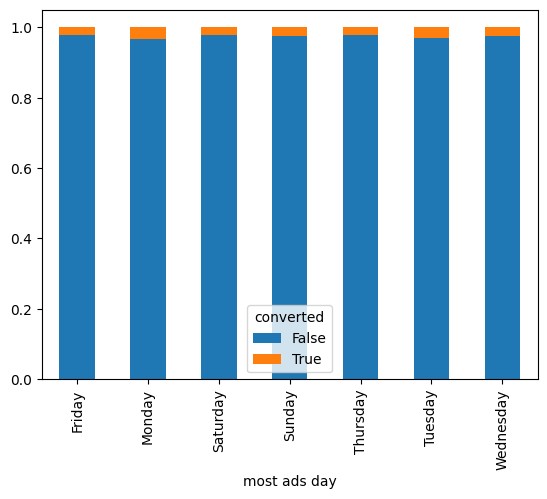

In [26]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

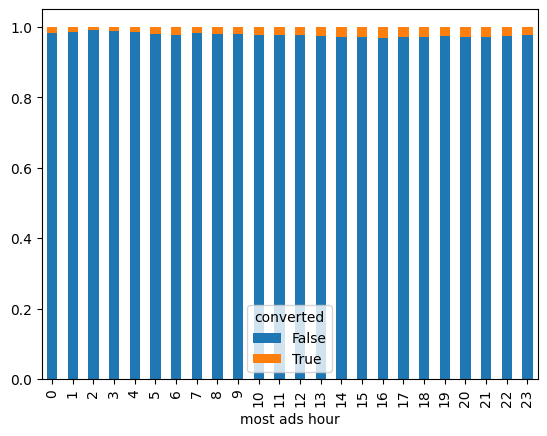

In [27]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

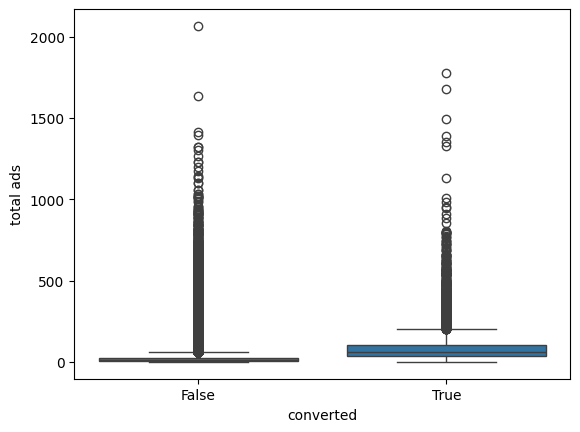

In [28]:
sns.boxplot(x='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

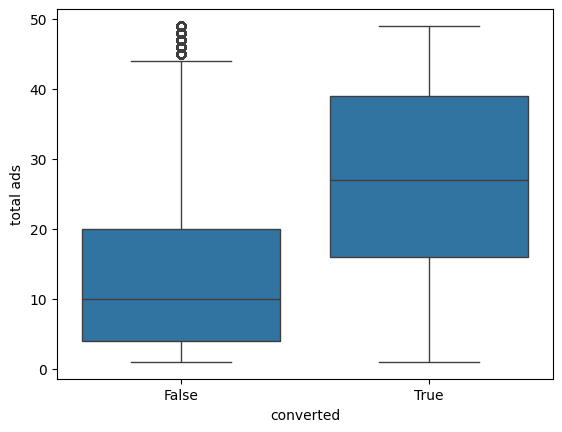

In [30]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads']<50])

## Statistical Tets

In [31]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    # Created a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    # Display the results
    print(f"\nChi-square tests\ for: {variable} vs. converted:")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")

    # Check for significance
    if p < alpha:
        print(f"The difference in conversion rates acress {variable} is statistically significant.")
    else:
        print(f"There is no significant difference inconversion rates across {variables}.")


Chi-square tests\ for: test group vs. converted:
Chi-squared value: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rates acress test group is statistically significant.

Chi-square tests\ for: most ads day vs. converted:
Chi-squared value: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rates acress most ads day is statistically significant.

Chi-square tests\ for: most ads hour vs. converted:
Chi-squared value: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rates acress most ads hour is statistically significant.


In [32]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [35]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1: Check Assumptions
# Normality Assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk Test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk Test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variance assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's Test for equality of variance: p-value = {levene_p_value}")

Shapiro-Wilk Test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk Test for normality (False group): p-value = 9.883049430735801e-204
Levene's Test for equality of variance: p-value = 0.0


In [36]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # If assumptions are met, perform a t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent  two-sample t-test: p-value = {t_p_value}")
else:
    # If assumptions are not met, perform a non-parametric test (Mann-Whitney U test)
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0
